In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets, metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn import preprocessing
#from sklearn.mixture import GMM
#from learning_model import *
#from sklearn.cross_validation import train_test_split
#from data_handle import * 

                x           y          pci        rsrp
count  220.000000  220.000000   220.000000  220.000000
mean    67.277139   13.790152  3971.363636  -86.657066
std     22.596434    6.035249   147.886031   12.113036
min      6.974500    0.935500  3700.000000 -125.670370
25%     54.137875    9.933625  3900.000000  -94.528977
50%     71.713750   13.237000  4000.000000  -85.153745
75%     84.394750   18.240625  4100.000000  -78.453276
max    102.161500   24.607000  4200.000000  -59.969203


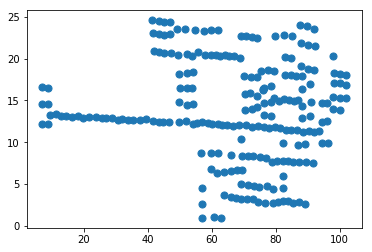

In [12]:
rem_pci_all = pd.read_csv("./interface/rsrp_set33_nodis.csv")
#rem_pci_all = pd.read_csv("rem_pci_train_pd.csv")
#rem_pci = pd.read_csv("rem_rsrp_train_pd.csv")
#rem_test = pd.read_csv("rem_test_pd.csv")
#rem_pci_np = np.genfromtxt('rem_pci_train.csv', delimiter=',')
#rem_rsrp = pd.read_csv("rem_rsrp_train.csv")
#print(rem_pci_all)
plt.scatter(rem_pci_all['x'], rem_pci_all['y'], s=50);
#print(type(rem_pci_all))
print(rem_pci_all.describe())



In [13]:
#rem_pci_all = preprocessing.scale(rem_pci_all)
#print (rem_pci_all)
#np.savetxt('normalize.csv', rem_pci_all, delimiter=',', fmt='%f')

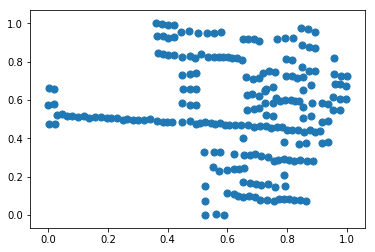

In [14]:
#print (rem_pci_all)
#print (type(rem_pci_all))
#print(rem_pci_all)
rem_pci_all.insert(4,"pci_37",0)
rem_pci_all.insert(5,"pci_38",0) 
rem_pci_all.insert(6,"pci_39",0) 
rem_pci_all.insert(7,"pci_40",0)
rem_pci_all.insert(8,"pci_41",0) 
rem_pci_all.insert(9,"pci_42",0) 


for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 3700:
        rem_pci_all.iloc[i,4] = "1"
    if rem_pci_all.iloc[i,2] == 3800:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 3900:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 4000:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 4100:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 4200:
        rem_pci_all.iloc[i,9] = "1"
#print(rem_pci_all)
#print("==========")
#rem_pci_all = rem_pci_all[['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
rem_pci_all = rem_pci_all[['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
rem_pci_all_copy = rem_pci_all
rem_pci_all_cut = rem_pci_all.drop(['pci'], axis=1)
#print(rem_pci_all)
#print(rem_pci_all)
#print("===")  
rem_pci_all=rem_pci_all_cut.values
#print (type(rem_pci_all))
#print (rem_pci_all)
#:::Normalize[0,1]
#print(rem_pci_all_cut)
min_max_scaler = preprocessing.MinMaxScaler()
rem_pci_all_n = min_max_scaler.fit_transform(rem_pci_all_cut)
#:::Normalize[-1,1]
  #max_abs_scaler = preprocessing.MaxAbsScaler()
  #rem_pci_all_n = max_abs_scaler.fit_transform(rem_pci_all_cut)

#:::Standardisation
#print(rem_pci_all_cut)
  #rem_pci_all_n = preprocessing.scale(rem_pci_all_cut)
#print(rem_pci_all_n.mean(axis=0))
#print(rem_pci_all_n.std(axis=0))
#print(rem_pci_all_n)
#print("===")  
rem_pci_all_n_pd = pd.DataFrame(rem_pci_all_n,columns = ['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'])
#print(rem_pci_all_n_pd)
rem_pci_all_n_pd.to_csv("./debug/rem_pci_all_n_pd.csv")
'''
for i in range(0,len(rem_pci_all_n_pd)):
    if rem_pci_all_n_pd.iloc[i,3] == 1:
        rem_pci_all_n_pd.iloc[i,3] = "0.5"
    if rem_pci_all_n_pd.iloc[i,4] == 1:
        rem_pci_all_n_pd.iloc[i,4] = "0.5"
    if rem_pci_all_n_pd.iloc[i,5] == 1:
        rem_pci_all_n_pd.iloc[i,5] = "0.5"
    if rem_pci_all_n_pd.iloc[i,6] == 1:
        rem_pci_all_n_pd.iloc[i,6] = "0.5"
    if rem_pci_all_n_pd.iloc[i,7] == 1:
        rem_pci_all_n_pd.iloc[i,7] = "0.5"
    if rem_pci_all_n_pd.iloc[i,8] == 1:
        rem_pci_all_n_pd.iloc[i,8] = "0.5"
#print (rem_pci_all_n_pd)
'''
plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50);


In [15]:
def group(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y','pci']).apply(pd.DataFrame.mode)
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

In [16]:
def group_pcimap(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y']).median()
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

0.7638670438399539


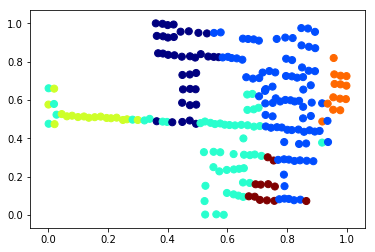

In [17]:
#print(rem_pci_all_n_pd)
group_median,group_drift = group_pcimap(rem_pci_all_n_pd)
#rsrp,group_drift = group(rem_rsrp)
#print("rem_rsrp==",rsrp)
#rem_rsrp.to_csv("rsrp.csv")
#group_median,group_drift = group(rem_test)
kmeans = KMeans(n_clusters=6)
#np.savetxt('group_median.csv', group_median, delimiter=',', fmt='%f')
#group_median = pd.read_csv("group_median.csv")
#print(rem_pci['pci'])
kmeans_fit = kmeans.fit(rem_pci_all_n_pd)
y_kmeans = kmeans.predict(rem_pci_all_n_pd)
#kmeans_fit = kmeans.fit(group_median)
#print(group_median)
#y_kmeans = kmeans.predict(group_median)
#print(y_kmeans)
#print(y_kmeans.shape)


#print(y_kmeans_pd)

#add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans.to_csv('add_kmeans.csv')
#print(group_median)
rem_pci_all_pd = pd.DataFrame(rem_pci_all_copy,columns=['x','y','rsrp','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci'])
#print(type(rem_pci_all_pd))
#print(type(add_kmeans))

#print(rem_pci_all_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50, c=y_kmeans, cmap='jet');
y_kmeans_pd = pd.DataFrame({'zone':y_kmeans})
add_kmeans = pd.merge(rem_pci_all_pd,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans = pd.merge(rem_pci_all_pd['pci'],add_kmeans, left_index=True, right_index=True)
#add_kmeans['zone'].replace(6,7,inplace=True)
add_kmeans['zone'].replace(5,6,inplace=True)
add_kmeans['zone'].replace(4,5,inplace=True)
add_kmeans['zone'].replace(3,4,inplace=True)
add_kmeans['zone'].replace(2,3,inplace=True)
add_kmeans['zone'].replace(1,2,inplace=True)
add_kmeans['zone'].replace(0,1,inplace=True)
add_kmeans['pci'] = add_kmeans['pci'].map(lambda x:int(x/100))

add_kmeans.to_csv('aaa.csv')
add_kmeans.values[:,:]
add_kmeans = add_kmeans.drop(['pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'], axis=1)
add_kmeans = add_kmeans[['x','y','pci','rsrp','zone']]
add_kmeans = add_kmeans.values
#print(add_kmeans)
np.savetxt('./zone_result/set33_part_train.csv', add_kmeans, delimiter=',', fmt='%s')
#y_kmeans = np.reshape(y_kmeans, (27, 105))
#np.savetxt('y_kmeans.csv', y_kmeans, delimiter=',', fmt='%f')
cluster_labels = kmeans_fit.labels_
silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
print(silhouette_avg)


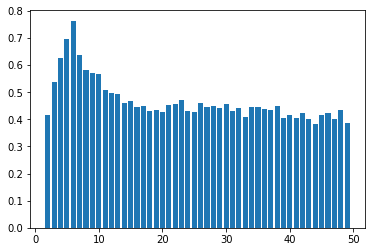

[0.4148935229030044, 0.5370080642049107, 0.6258616948452674, 0.6948234427128495, 0.7638670438399539, 0.6368781087910173, 0.5804842964455564, 0.5701608109393009, 0.5687602924139674, 0.5079040120994966, 0.49643635824419474, 0.4928995683860114, 0.46181723382377626, 0.46722708896619963, 0.44615969824124163, 0.4500939300110298, 0.4320250065781199, 0.4354163564058824, 0.4261438242923413, 0.45161150425044083, 0.45818733288320757, 0.4716337091281912, 0.4304618734229825, 0.4283951965979106, 0.46076904333490815, 0.4446046881902421, 0.44798430467417205, 0.4434147993132271, 0.45529863419185984, 0.4316963783588844, 0.4420471081229616, 0.40689622051995505, 0.4456356264965137, 0.44634942289001484, 0.4394071387982645, 0.4331862057696757, 0.4482928630698053, 0.404859951101001, 0.41711285322526287, 0.40534626538873614, 0.4246912744936254, 0.3999491689324561, 0.3840655388333277, 0.41628536488762924, 0.4230923154602009, 0.3998935521536185, 0.4336132889152277, 0.38771359239933256]


In [18]:
# 迴圈
silhouette_avgs = []
ks = range(2, 50)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_pci_all_n_pd)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

NameError: name 'GMM' is not defined